In [55]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/LAXMI NISHAD/OneDrive/Desktop/Python_lectures/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [5]:
# 1.What is the total number of confirmed cases worldwide?
df['Confirmed'].sum()

26252051758.0

In [65]:
# 2.How many deaths have been reported globally?
df1=df['Deaths'].unique()
print(len(df1))

20089


In [23]:
# 3.What is the total number of recovered cases worldwide?
df['Recovered'].sum()

15450237912.0

In [63]:
# 4.How many countries/regions are represented in the dataset?
df1=df['Country/Region'].unique()
print(len(df1))

229


<Axes: xlabel='Date', ylabel='Total Confirmed Cases'>

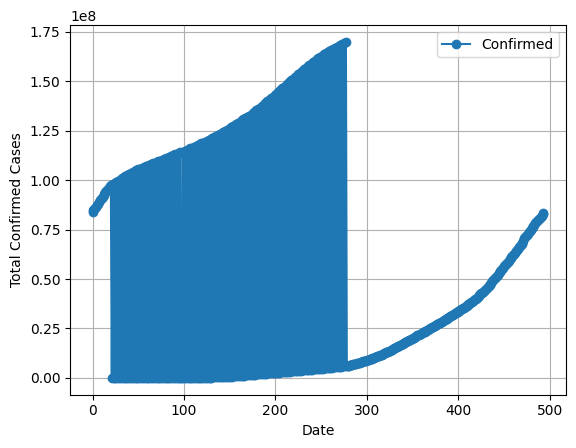

In [120]:
# 5.What is the trend of confirmed cases over time globally?
trend=df.groupby('ObservationDate') ['Confirmed'].sum().reset_index()
g_trend=trend.sort_values(by='ObservationDate')
g_trend.plot(kind='line',marker='o',linestyle='-',grid=True,xlabel='Date',ylabel='Total Confirmed Cases')

In [24]:
# 6.Which province/state has reported the highest number of confirmed cases?
max_conf=df.groupby(by='Province/State')['Confirmed'].max()
conf_case=max_conf.idxmax()
print(conf_case,'=',df['Confirmed'].max())

Maharashtra = 5863138.0


In [25]:
# 7.Which country/region has the highest number of deaths?
max_deaths=df.groupby(by='Country/Region')['Deaths'].max()
deaths=max_deaths.idxmax()
print(deaths,'=',df['Deaths'].max())

UK = 112385.0


In [77]:
# 8.How does the number of confirmed cases vary across different provinces/states?
p_s=df.groupby(by='Province/State')['Confirmed'].sum().reset_index()
df1=p_s.sort_values(by='Confirmed',ascending=False)
df1

,Province/State,Confirmed
88,California,696898013.0
365,Maharashtra,681186928.0
171,England,666227518.0
630,Texas,552039886.0
570,Sao Paulo,521308945.0
...,...,...
17,American Samoa,0.0
278,Jervis Bay Territory,0.0
526,Recovered,0.0
404,"Montgomery County, TX",0.0


<Axes: xlabel='Date', ylabel='Total Deaths'>

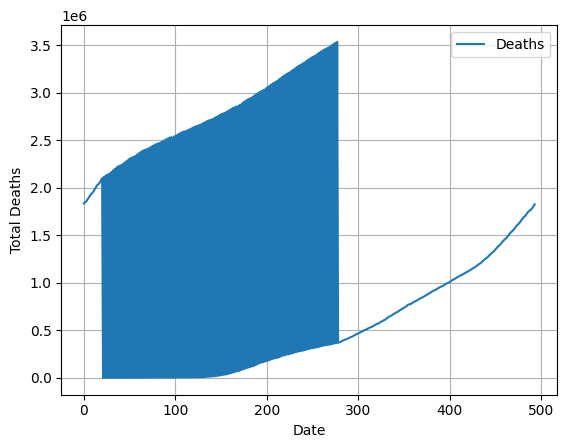

In [79]:
# 9.What is the trend of deaths over time globally?
trend=df.groupby('ObservationDate')['Deaths'].sum().reset_index()
g_trend=trend.sort_values(by='ObservationDate')
g_trend.plot(kind='line',linestyle='-',grid=True,xlabel='Date',ylabel='Total Deaths')

In [86]:
# 10.Which country/region has the highest number of recovered cases?
country=df.groupby('Country/Region')['Recovered'].max()
df1=country.idxmax()
print(df1,'=',df['Recovered'].max())

US = 6399531.0


In [88]:
# 11.How does the number of recovered cases vary across different countries/regions?
c_r=df.groupby('Country/Region')['Recovered'].sum().reset_index()
df1=c_r.sort_values(by='Recovered',ascending=False)
df1

,Country/Region,Recovered
96,India,2.900590e+09
27,Brazil,2.313677e+09
172,Russia,7.907057e+08
212,Turkey,5.641706e+08
214,US,5.033710e+08
...,...,...
166,Puerto Rico,0.000000e+00
168,Republic of Ireland,0.000000e+00
169,Republic of the Congo,0.000000e+00
170,Reunion,0.000000e+00


<Axes: ylabel='Count'>

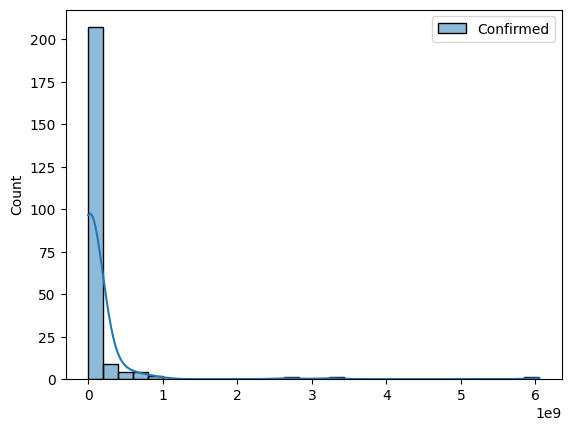

In [107]:
# 12.What is the distribution of confirmed cases by country/region?
import seaborn as sns
dst=df.groupby('Country/Region')['Confirmed'].sum().reset_index()
sns.histplot(data=dst,kde=True,bins=30)

In [108]:
# 13.Is there a correlation between the number of confirmed cases and deaths?
df[['Confirmed','Deaths']].corr()

,Confirmed,Deaths
Confirmed,1.000000,0.888416
Deaths,0.888416,1.000000


In [109]:
# 14.Is there a correlation between the number of confirmed cases and recovered cases?
df[['Confirmed','Recovered']].corr()

,Confirmed,Recovered
Confirmed,1.000000,0.633479
Recovered,0.633479,1.000000


In [115]:
# 15.How does the mortality rate vary across different countries/regions?
country = df.groupby('Country/Region')[['Confirmed','Deaths']].sum().reset_index()
country['Mortality Rate'] = (country['Deaths'] / country['Confirmed']) * 100
country_sorted = country.sort_values(by='Mortality Rate', ascending=False)
country_sorted

,Country/Region,Confirmed,Deaths,Mortality Rate
225,Yemen,962066.0,237613.0,24.698202
123,MS Zaandam,3824.0,848.0,22.175732
220,Vanuatu,406.0,39.0,9.605911
137,Mexico,460463678.0,43005509.0,9.339609
197,Sudan,7632455.0,488709.0,6.403038
...,...,...,...,...
124,Macau,20605.0,0.0,0.000000
1,"('St. Martin',)",2.0,0.0,0.000000
110,Kiribati,21.0,0.0,0.000000
228,occupied Palestinian territory,25.0,0.0,0.000000


In [119]:
# 16.How does the recovery rate vary across different countries/regions?
country=df.groupby('Country/Region')[['Recovered','Confirmed']].sum().reset_index()
country['Recovery Rate']=(country['Recovered'] / country['Confirmed'])*100
country_sorted=country.sort_values(by='Recovery Rate',ascending=False)
country_sorted

,Country/Region,Recovered,Confirmed,Recovery Rate
219,Uzbekistan,21035683.0,22207571.0,94.723025
78,Ghana,19586296.0,20784664.0,94.234364
55,Diamond Princess,288580.0,306872.0,94.039209
138,Micronesia,121.0,129.0,93.798450
95,Iceland,1621682.0,1729527.0,93.764480
...,...,...,...,...
168,Republic of Ireland,0.0,21.0,0.000000
169,Republic of the Congo,0.0,1.0,0.000000
170,Reunion,0.0,137.0,0.000000
228,occupied Palestinian territory,0.0,25.0,0.000000


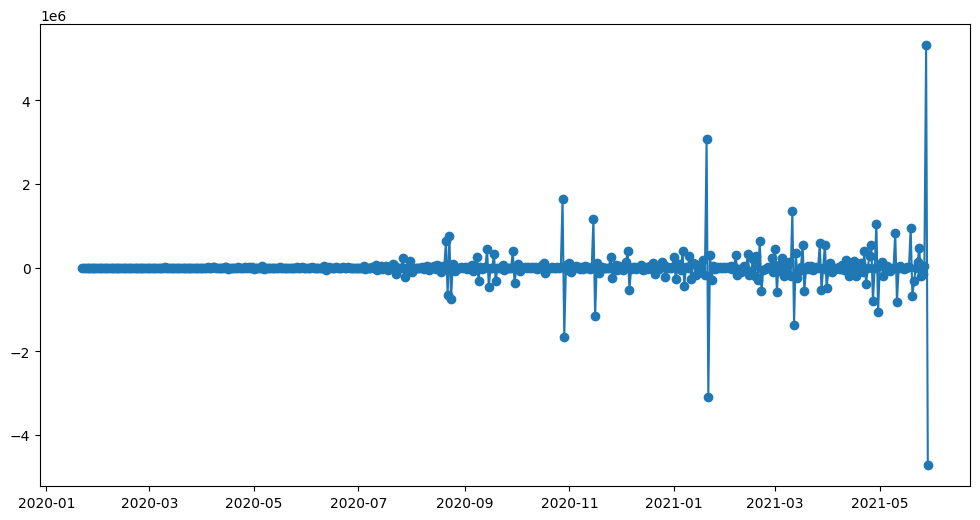

In [168]:
# 17.What is the trend of new confirmed cases over time globally?
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df = df.sort_values(by='ObservationDate')
df['New Confirmed'] = df['Confirmed'].diff().fillna(0)
global_new_cases = df.groupby('ObservationDate')['New Confirmed'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(global_new_cases['ObservationDate'],global_new_cases['New Confirmed'],linestyle='-',marker='o')

In [143]:
# 18.How does the fatality rate vary across different provinces/states?
country = df.groupby('Provinces/State')[['Confirmed','Deaths']].sum().reset_index()
country['Fatality Rate'] = (country['Deaths'] / country['Confirmed']) * 100
country_sorted = country.sort_values(by='Fatality Rate', ascending=False)
country_sorted

,Province/State,Confirmed,Deaths,Fatality Rate
668,Unknown,7804169.0,4247616.0,54.427525
568,"Santa Rosa County, FL",5.0,2.0,40.000000
338,"Lee County, FL",6.0,2.0,33.333333
314,"King County, WA",412.0,91.0,22.087379
499,"Placer County, CA",28.0,6.0,21.428571
...,...,...,...,...
17,American Samoa,0.0,0.0,NaN
173,External territories,0.0,0.0,NaN
278,Jervis Bay Territory,0.0,0.0,NaN
404,"Montgomery County, TX",0.0,0.0,NaN


In [144]:
# 19.How does the recovery rate vary across different provinces/states?
country=df.groupby('Province/State')[['Recovered','Confirmed']].sum().reset_index()
country['Recovery Rate']=(country['Recovered'] / country['Confirmed'])*100
country_sorted=country.sort_values(by='Recovery Rate',ascending=False)
country_sorted

,Province/State,Recovered,Confirmed,Recovery Rate
526,Recovered,504048696.0,0.0,inf
656,US,532.0,4.0,1.330000e+04
668,Unknown,619474280.0,7804169.0,7.937735e+03
527,Repatriated Travellers,2431.0,2431.0,1.000000e+02
549,"Saint Helena, Ascension and Tristan da Cunha",863.0,882.0,9.784580e+01
...,...,...,...,...
735,Zuid-Holland,0.0,55835700.0,0.000000e+00
17,American Samoa,0.0,0.0,NaN
173,External territories,0.0,0.0,NaN
278,Jervis Bay Territory,0.0,0.0,NaN


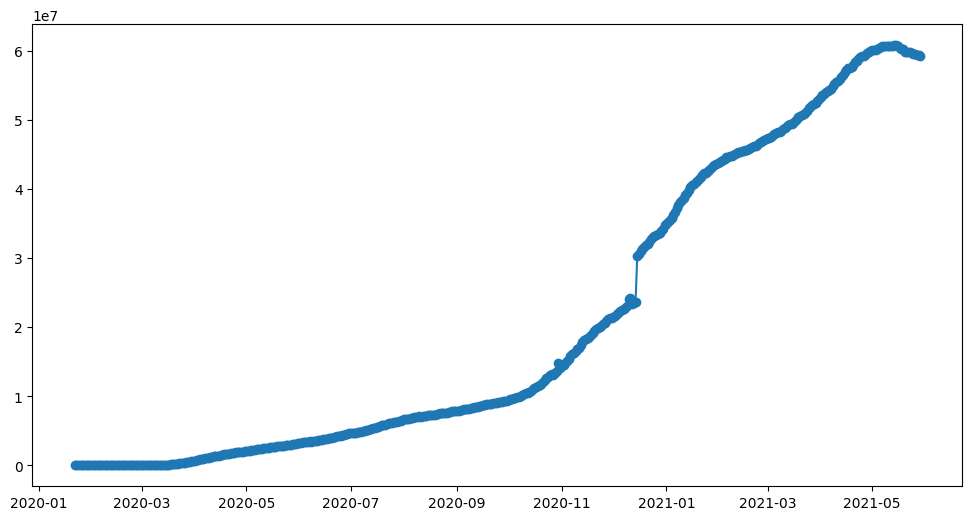

In [169]:
# 20.What is the trend of active cases over time globally?
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df = df.sort_values(by='ObservationDate')
df['Active Cases'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])
global_active_cases = df.groupby('ObservationDate')['Active Cases'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(global_active_cases['ObservationDate'],global_active_cases['Active Cases'],linestyle='-',marker='o')